In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
df =pd.read_csv('Fakenewsdetection/train.csv')
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [4]:
x= df.drop('label',axis=1)

In [5]:
print(x)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
5          5  Jackie Mason: Hollywood Would Love Trump if He...   
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7          7  Benoît Hamon Wins French Socialist Party’s Pre...   
8          8  Excerpts From a Draft Script for Donald Trump’...   
9          9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10  Obama’s Organizing for Action Partners with So...   
11        11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
13        13  US Officials See No Link Between Trump and Russi

In [10]:
x.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [11]:
y = df['label']

In [12]:
df.shape

(20800, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [14]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
df=df.dropna()

In [16]:
print(df)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
5          5  Jackie Mason: Hollywood Would Love Trump if He...   
7          7  Benoît Hamon Wins French Socialist Party’s Pre...   
9          9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10  Obama’s Organizing for Action Partners with So...   
11        11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
13        13  US Officials See No Link Between Trump and Russia   
14        14  Re: Yes, There Are Paid Government Trolls On S...   
15        15  In Major League Soccer, Argentines Find a Home..

In [17]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
df['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [19]:
messeges =df.copy()

In [20]:
messeges.reset_index(inplace=True)

In [21]:
messeges.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
corpus = []
for i in range(0, len(messeges)):
    review = re.sub('[^a-zA-Z]', ' ', messeges['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
corpus[6]

'beno hamon win french socialist parti presidenti nomin new york time'

In [31]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [32]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hous': 2049,
 'dem': 1103,
 'aid': 89,
 'even': 1453,
 'see': 3868,
 'comey': 820,
 'letter': 2457,
 'jason': 2241,
 'chaffetz': 645,
 'tweet': 4613,
 'comey letter': 822,
 'jason chaffetz': 2242,
 'flynn': 1665,
 'hillari': 1985,
 'clinton': 751,
 'big': 396,
 'woman': 4916,
 'campu': 574,
 'breitbart': 489,
 'hillari clinton': 1987,
 'campu breitbart': 575,
 'truth': 4598,
 'might': 2698,
 'get': 1789,
 'fire': 1627,
 'civilian': 734,
 'kill': 2334,
 'singl': 3982,
 'us': 4671,
 'airstrik': 98,
 'identifi': 2086,
 'us airstrik': 4672,
 'iranian': 2196,
 'jail': 2230,
 'fiction': 1596,
 'stori': 4167,
 'stone': 4164,
 'death': 1064,
 'jacki': 2228,
 'mason': 2611,
 'hollywood': 2020,
 'would': 4945,
 'love': 2534,
 'trump': 4503,
 'bomb': 451,
 'north': 2949,
 'korea': 2359,
 'lack': 2378,
 'tran': 4459,
 'bathroom': 340,
 'exclus': 1472,
 'video': 4720,
 'north korea': 2952,
 'win': 4894,
 'french': 1726,
 'socialist': 4033,
 'parti': 3138,
 'presidenti': 3366,
 'nomin': 2945,
 'ne

In [33]:
X.shape

(18285, 5000)

In [34]:
y=messeges['label']

In [35]:
print(y)

0        1
1        0
2        1
3        1
4        1
5        0
6        0
7        0
8        0
9        0
10       1
11       1
12       1
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       0
21       1
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
        ..
18255    0
18256    1
18257    1
18258    1
18259    1
18260    0
18261    1
18262    1
18263    1
18264    0
18265    0
18266    0
18267    1
18268    1
18269    0
18270    1
18271    0
18272    0
18273    1
18274    0
18275    0
18276    1
18277    0
18278    1
18279    0
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64


In [36]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [38]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [39]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [40]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


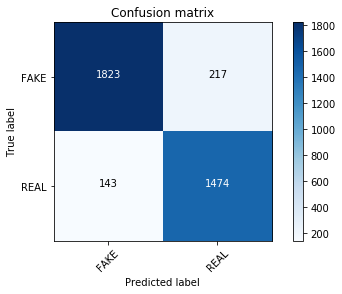

In [49]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [50]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9015586546349467

In [51]:
y_train.shape

(14628,)

In [52]:
classifier=MultinomialNB(alpha=0.1)

In [53]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8955427946404156
Alpha: 0.1, Score : 0.9051134809953514
Alpha: 0.2, Score : 0.9051134809953514
Alpha: 0.30000000000000004, Score : 0.9059338255400602
Alpha: 0.4, Score : 0.9051134809953514
Alpha: 0.5, Score : 0.9042931364506426
Alpha: 0.6000000000000001, Score : 0.9037462400875034
Alpha: 0.7000000000000001, Score : 0.9026524473612251
Alpha: 0.8, Score : 0.9021055509980859
Alpha: 0.9, Score : 0.9015586546349467


In [54]:
## Get Features names
feature_names = cv.get_feature_names()

In [56]:
classifier.coef_[0]

array([ -9.25630829,  -8.65949222,  -9.25630829, ..., -10.95090401,
        -8.77868073,  -9.48456694])

In [57]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.959114000028925, 'trump'),
 (-4.270607131437483, 'hillari'),
 (-4.354971714376536, 'clinton'),
 (-4.882221251134608, 'elect'),
 (-5.1420944065413465, 'new'),
 (-5.258669435885832, 'video'),
 (-5.262423194047336, 'comment'),
 (-5.357019074680328, 'us'),
 (-5.373693074987398, 'war'),
 (-5.3821355058826805, 'hillari clinton'),
 (-5.412258265337789, 'fbi'),
 (-5.461507250345735, 'vote'),
 (-5.475370688647845, 'email'),
 (-5.552741306436383, 'world'),
 (-5.5833715723846264, 'obama'),
 (-5.687063070936072, 'donald'),
 (-5.722174928212814, 'donald trump'),
 (-5.740204262730757, 'russia'),
 (-5.822321082694582, 'america'),
 (-5.842268552606346, 'presid')]

In [58]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.950904007954136, 'abroad'),
 (-10.950904007954136, 'abus new'),
 (-10.950904007954136, 'abus new york'),
 (-10.950904007954136, 'act new'),
 (-10.950904007954136, 'act new york'),
 (-10.950904007954136, 'advic'),
 (-10.950904007954136, 'advis new'),
 (-10.950904007954136, 'advis new york'),
 (-10.950904007954136, 'age new'),
 (-10.950904007954136, 'age new york'),
 (-10.950904007954136, 'agenda breitbart'),
 (-10.950904007954136, 'aleppo new'),
 (-10.950904007954136, 'aleppo new york'),
 (-10.950904007954136, 'ali'),
 (-10.950904007954136, 'america breitbart'),
 (-10.950904007954136, 'america new york'),
 (-10.950904007954136, 'american breitbart'),
 (-10.950904007954136, 'american new'),
 (-10.950904007954136, 'american new york'),
 (-10.950904007954136, 'ami'),
 (-10.950904007954136, 'ami schumer'),
 (-10.950904007954136, 'amp'),
 (-10.950904007954136, 'applaud'),
 (-10.950904007954136, 'arson'),
 (-10.950904007954136, 'asian'),
 (-10.950904007954136, 'assail'),
 (-10.950904007

In [68]:
train=pd.read_csv('Fakenewsdetection/train.csv')
test=pd.read_csv('Fakenewsdetection/test.csv')
test.info()
test['label']='t'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
id        5200 non-null int64
title     5078 non-null object
author    4697 non-null object
text      5193 non-null object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

#data prep
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [71]:
targets = train['label'].values
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = transformer.fit_transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(float(n_samples) / df) + 1.0


In [72]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

Extr = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
Extr.fit(X_train, y_train)
print('Accuracy of ExtrTrees classifier on training set: {:.2f}'
     .format(Extr.score(X_train, y_train)))
print('Accuracy of Extratrees classifier on test set: {:.2f}'
     .format(Extr.score(X_test, y_test)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy of ExtrTrees classifier on training set: 1.00
Accuracy of Extratrees classifier on test set: 0.83


In [80]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.78


In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


In [78]:
targets = train['label'].values
logreg = LogisticRegression()
logreg.fit(counts, targets)

example_counts = count_vectorizer.transform(test['total'].values)
predictions = logreg.predict(example_counts)
pred=pd.DataFrame(predictions,columns=['label'])
pred['id']=test['id']
pred.groupby('label').count()

,id
label,
0,2611
1,2589


In [85]:
pred.to_csv('Fakenewsdetection/countvect5.csv', index=False)
